In [1]:
import pandas as pd
import numpy as np

In [2]:
orig=pd.read_csv("D://DataScience/Assignments/11-Decision Trees/Company_Data.csv")
orig.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
len(orig)

400

In [5]:
orig.Sales.mean()

7.496325

## Convert Sales column to categorical value.If the sale is above average 1 and below average 0

In [6]:
orig['sales_cat']='X'
orig

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_cat
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,X
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,X
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,X
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,X
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,X
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,X
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,X
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,X
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,X


In [7]:
for i in range (0,len(orig)):
    if orig.Sales[i] < orig.Sales.mean():
        orig.sales_cat[i]=0   # 0 Indicates low_sales 
    else:
        orig.sales_cat[i]=1   # 1 Inddicates High_sales

<ipython-input-7-ea0ad3f49e35>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orig.sales_cat[i]=1   # 1 Inddicates High_sales
<ipython-input-7-ea0ad3f49e35>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orig.sales_cat[i]=0   # 0 Indicates low_sales


In [11]:
orig.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_cat
0,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,111,48,16,260,83,Good,65,10,Yes,Yes,1
2,113,35,10,269,80,Medium,59,12,Yes,Yes,1
3,117,100,4,466,97,Medium,55,14,Yes,Yes,0
4,141,64,3,340,128,Bad,38,13,Yes,No,0


In [ ]:
#Dropping "Sales" column
orig=orig.drop(['Sales'],axis=1)
orig.head()

## Convert numerical to categorical

In [12]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
orig['ShelveLoc']= label_encoder.fit_transform(orig['ShelveLoc'])
orig['Urban']= label_encoder.fit_transform(orig['Urban']) 
orig['US']= label_encoder.fit_transform(orig['US']) 
orig.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_cat
0,138,73,11,276,120,0,42,17,1,1,1
1,111,48,16,260,83,1,65,10,1,1,1
2,113,35,10,269,80,2,59,12,1,1,1
3,117,100,4,466,97,2,55,14,1,1,0
4,141,64,3,340,128,0,38,13,1,0,0


In [28]:
x=orig.iloc[:,0:10]
x.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0


In [15]:
y=orig.iloc[:,10]
y.head()

0    1
1    1
2    1
3    0
4    0
Name: sales_cat, dtype: object

0    201
1    199
Name: sales_cat, dtype: int64


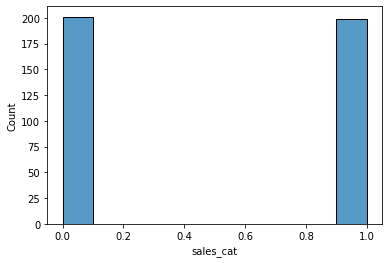

In [16]:
import seaborn as sns
sns.histplot(orig['sales_cat'])
print(orig.sales_cat.value_counts())

## Convert x and y to array format

In [43]:
x_ary=np.asarray(x,dtype=np.int)
x_ary

array([[138,  73,  11, ...,  17,   1,   1],
       [111,  48,  16, ...,  10,   1,   1],
       [113,  35,  10, ...,  12,   1,   1],
       ...,
       [162,  26,  12, ...,  18,   1,   1],
       [100,  79,   7, ...,  12,   1,   1],
       [134,  37,   0, ...,  16,   1,   1]])

In [44]:
y_ary=np.asarray(y,dtype=np.int)
y_ary

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [45]:
# Splitting data into training and testing data set
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x_ary,y_ary, test_size=0.2,random_state=40)
print(x_train.shape," ",x_test.shape," ",y_train.shape," ",y_test.shape)

(320, 10)   (80, 10)   (320,)   (80,)


## Model validation through kfold

In [97]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10, random_state=7)

C:\Users\jeysu_000\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


## Building  Decision Tree Classifier using Entropy

In [109]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [102]:
model1=DecisionTreeClassifier(criterion ='entropy',max_depth=5)

In [103]:
results = cross_val_score(model1, x_ary, y_ary, cv=kfold)
results

array([0.8  , 0.7  , 0.625, 0.65 , 0.75 , 0.775, 0.75 , 0.625, 0.775,
       0.75 ])

In [104]:
print(results.mean())

0.72


In [111]:
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

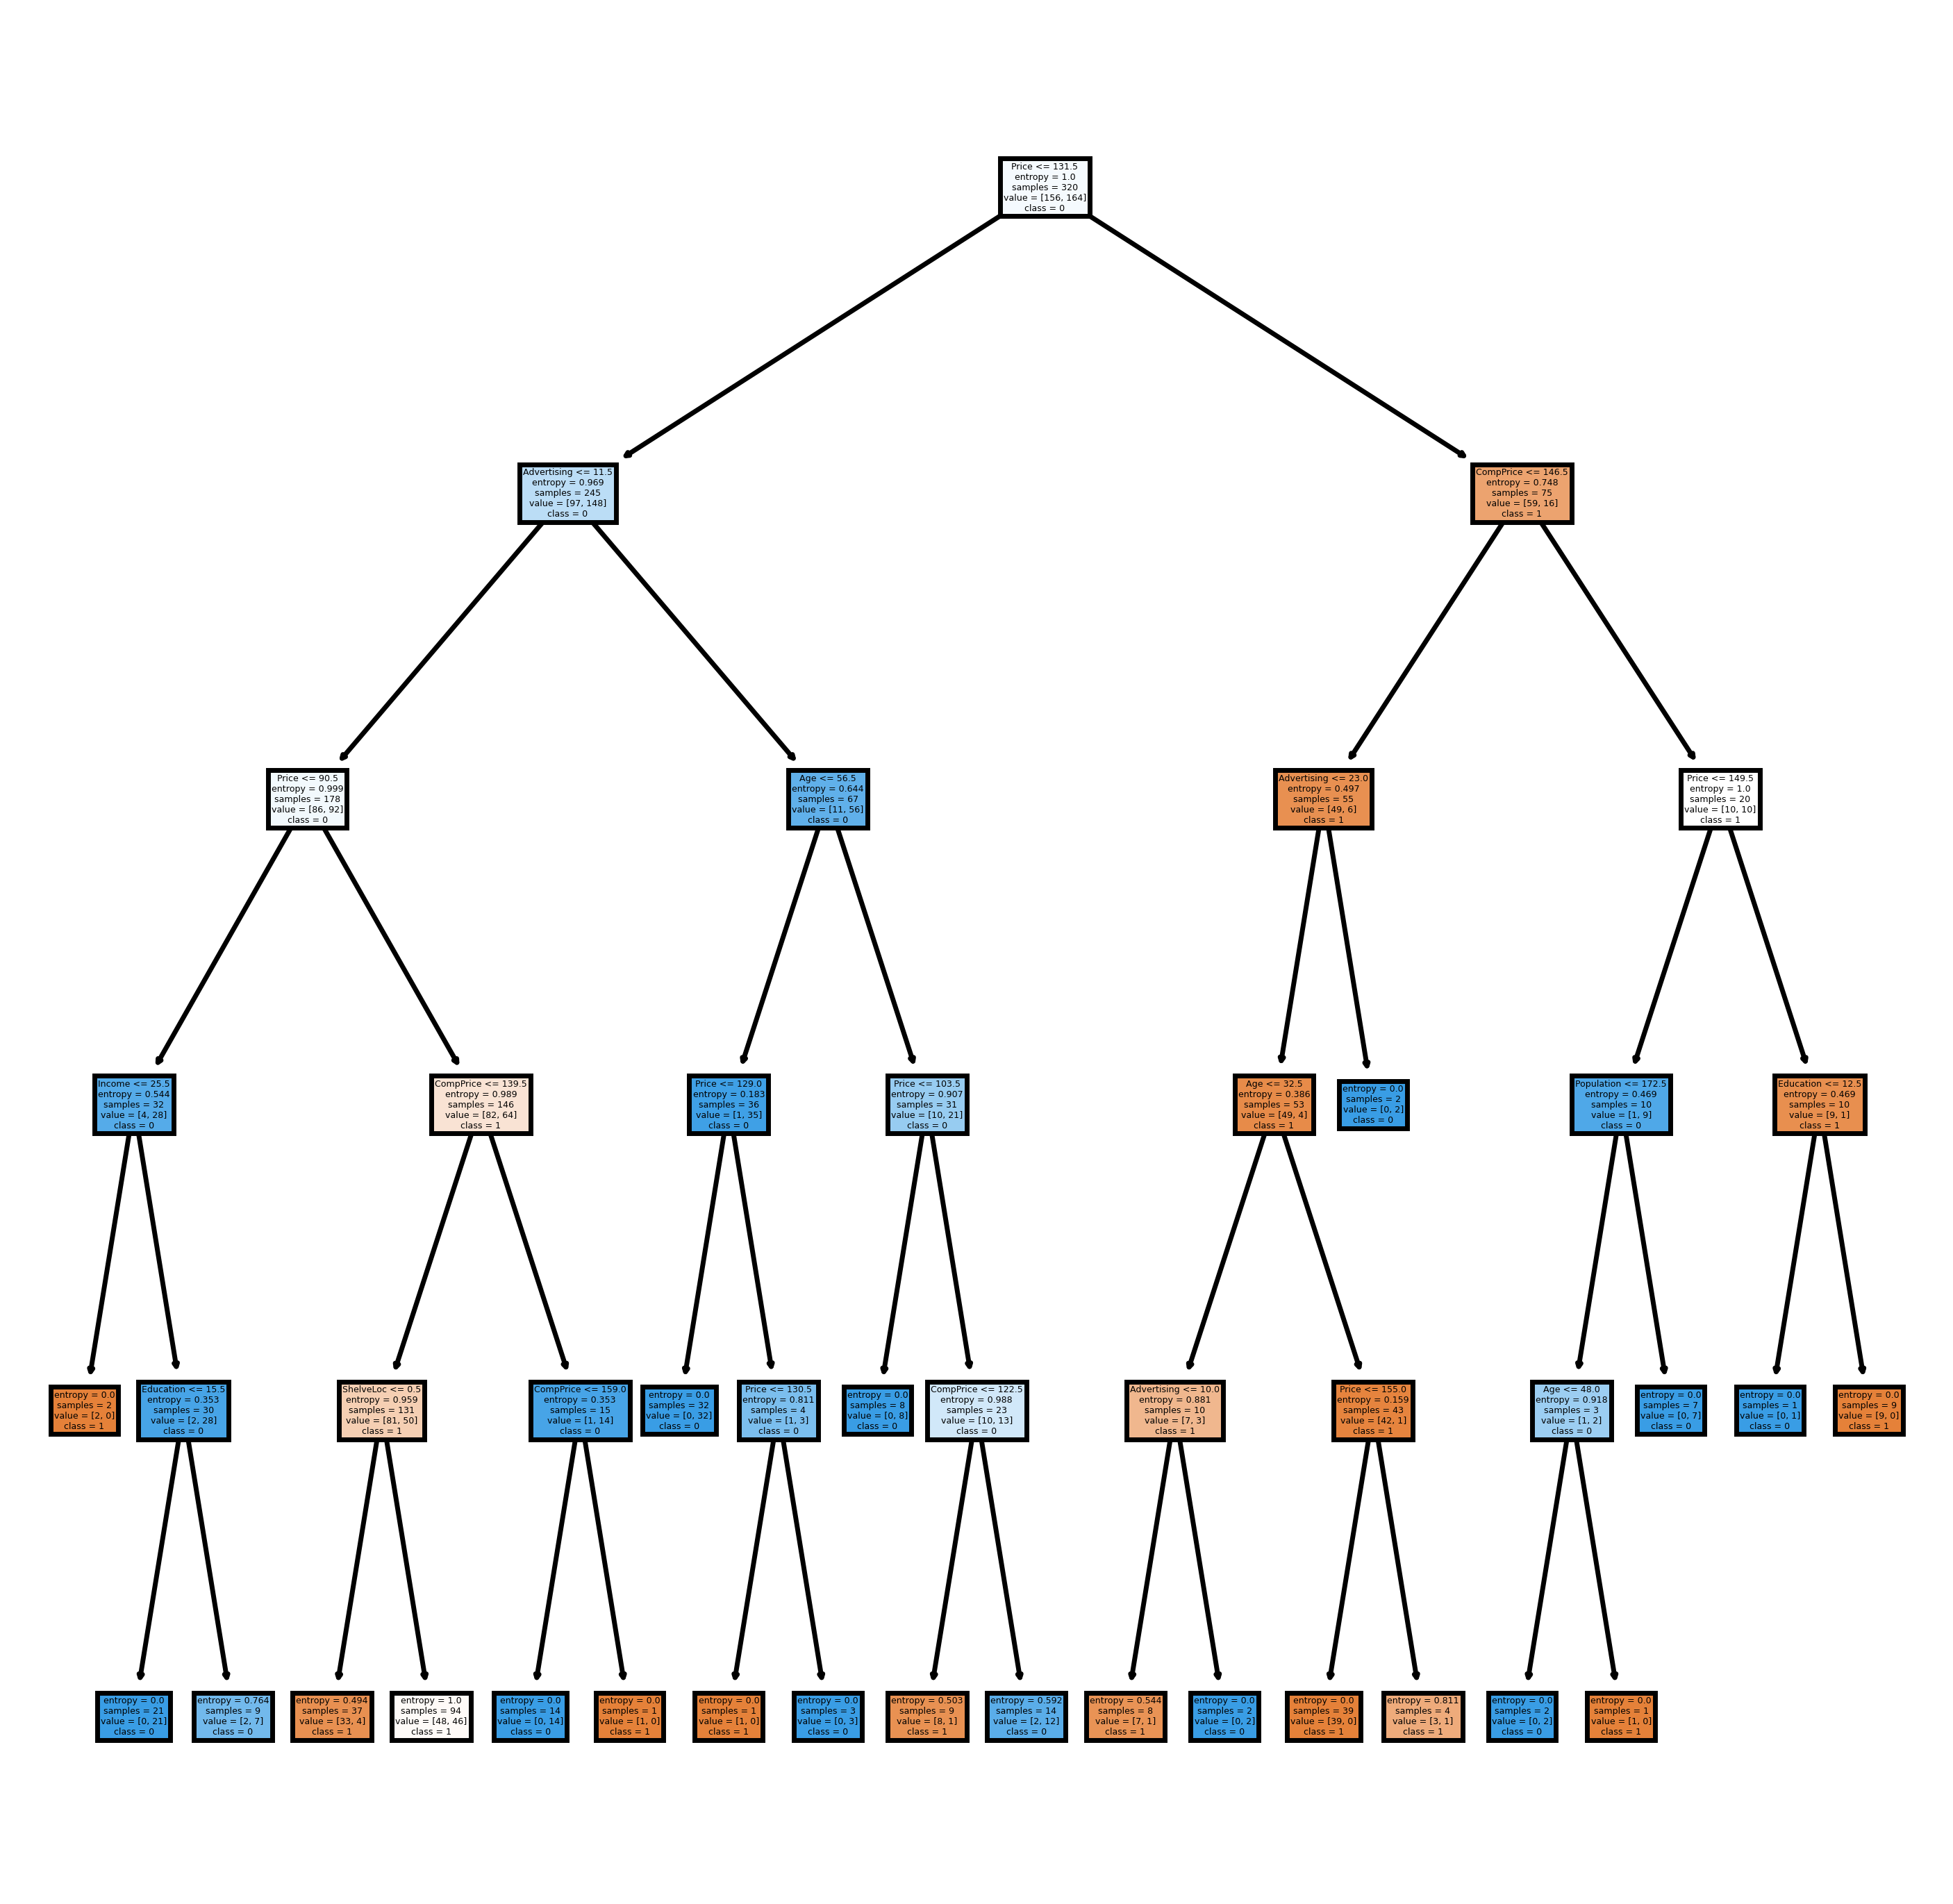

In [112]:
import matplotlib.pyplot as plt
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US'] # Feature Name
cn=['1', '0'] # class Names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (7,7), dpi=500)
tree.plot_tree(model1,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

## with gini (Information gain)

In [113]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
model2 = DecisionTreeClassifier(criterion ='gini',max_depth=5)#Max_depth is tree size
model2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

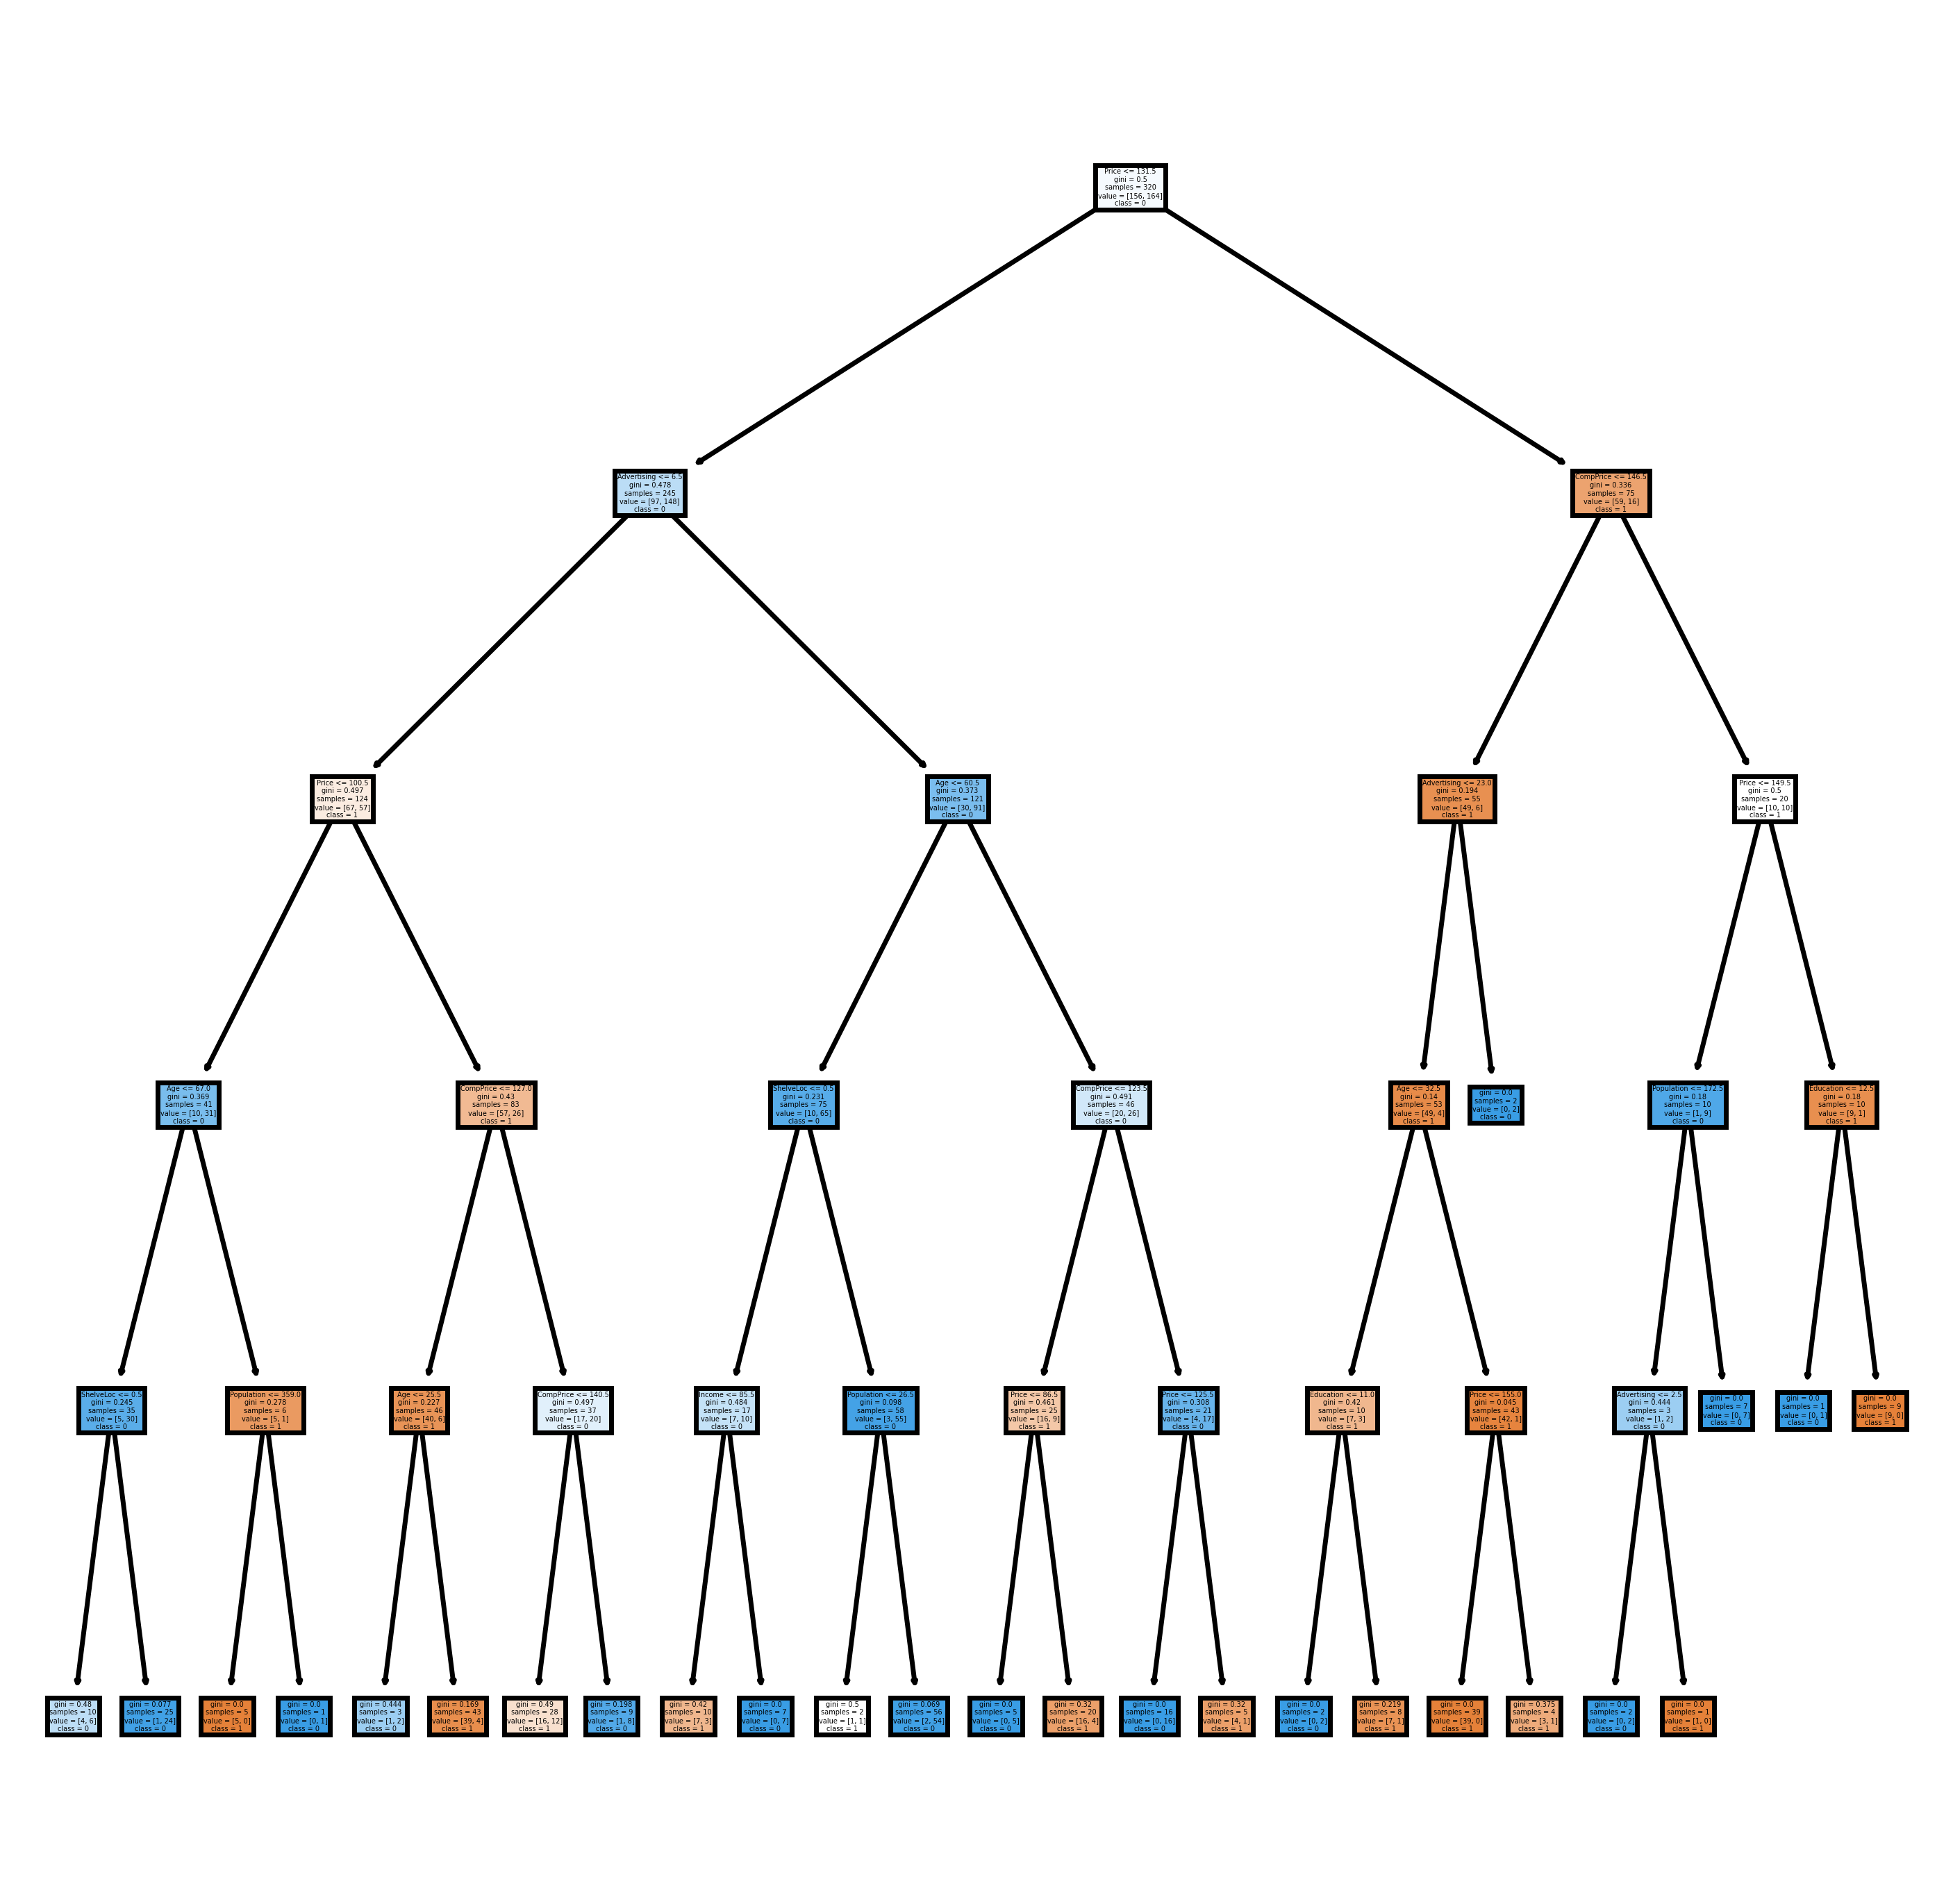

In [116]:
import matplotlib.pyplot as plt
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US'] # Feature Name
cn=['1', '0'] # class Names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (7,7), dpi=500)
tree.plot_tree(model2,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [114]:
results = cross_val_score(model2, x_ary, y_ary, cv=kfold)
results

array([0.75 , 0.7  , 0.575, 0.65 , 0.725, 0.8  , 0.775, 0.625, 0.8  ,
       0.625])

In [115]:
print(results.mean())

0.7024999999999999
